# Question 7

Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

    Insights to be drawn -
    ● Get all the Earth meteorites that fell before the year 2000
    ● Get all the earth meteorites co-ordinates who fell before the year 1970
    ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
    than 10000k

In [1]:
# importing neccesary libraries
import numpy as np  # for numerical calculation
import pandas as pd            # for reading dataset and analysis
import matplotlib.pyplot as plt   # for visualization
import seaborn as sns    # for visualization

In [2]:
df=pd.read_csv('nasa_meteorite_data.csv')   # read the data 
df.head()  # read ist 5 rows

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113.0, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [3]:
df.shape  # get shape in form of rows and columns (features)

(1000, 10)

In [4]:
df.info()  # get information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1000 non-null   object 
 1   id           1000 non-null   int64  
 2   nametype     1000 non-null   object 
 3   recclass     1000 non-null   object 
 4   mass         1000 non-null   float64
 5   fall         1000 non-null   object 
 6   year         999 non-null    object 
 7   reclat       1000 non-null   float64
 8   reclong      1000 non-null   float64
 9   coordinates  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [5]:
df.isnull().sum()  # checking missing values

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           1
reclat         0
reclong        0
coordinates    0
dtype: int64

In [6]:
df['Year']=df['year'].fillna(df['year'].mode()[0]) # fill missing value

In [7]:
df.isnull().sum()   # checking  missing values

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           1
reclat         0
reclong        0
coordinates    0
Year           0
dtype: int64

#### Get all the Earth meteorites that fell before the year 2000

In [9]:
split_year=lambda x:int(x.split('-')[0])    # split the year column using lambda
split_year('1880-01-01')

1880

In [12]:
fell_before_2000 =df[(df['Year'].apply(split_year)<2000)& (df['fall'] == 'Fell')]  
fell_before_2000        # Get all the Earth meteorites that fell before the year 2000

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,coordinates,Year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]",1880-01-01
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]",1951-01-01
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"[-113.0, 54.21667]",1952-01-01
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]",1976-01-01
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]",1902-01-01
...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,"[35.2, 54.5]",1807-01-01
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]",1934-01-01
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]",1869-01-01
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]",1922-01-01


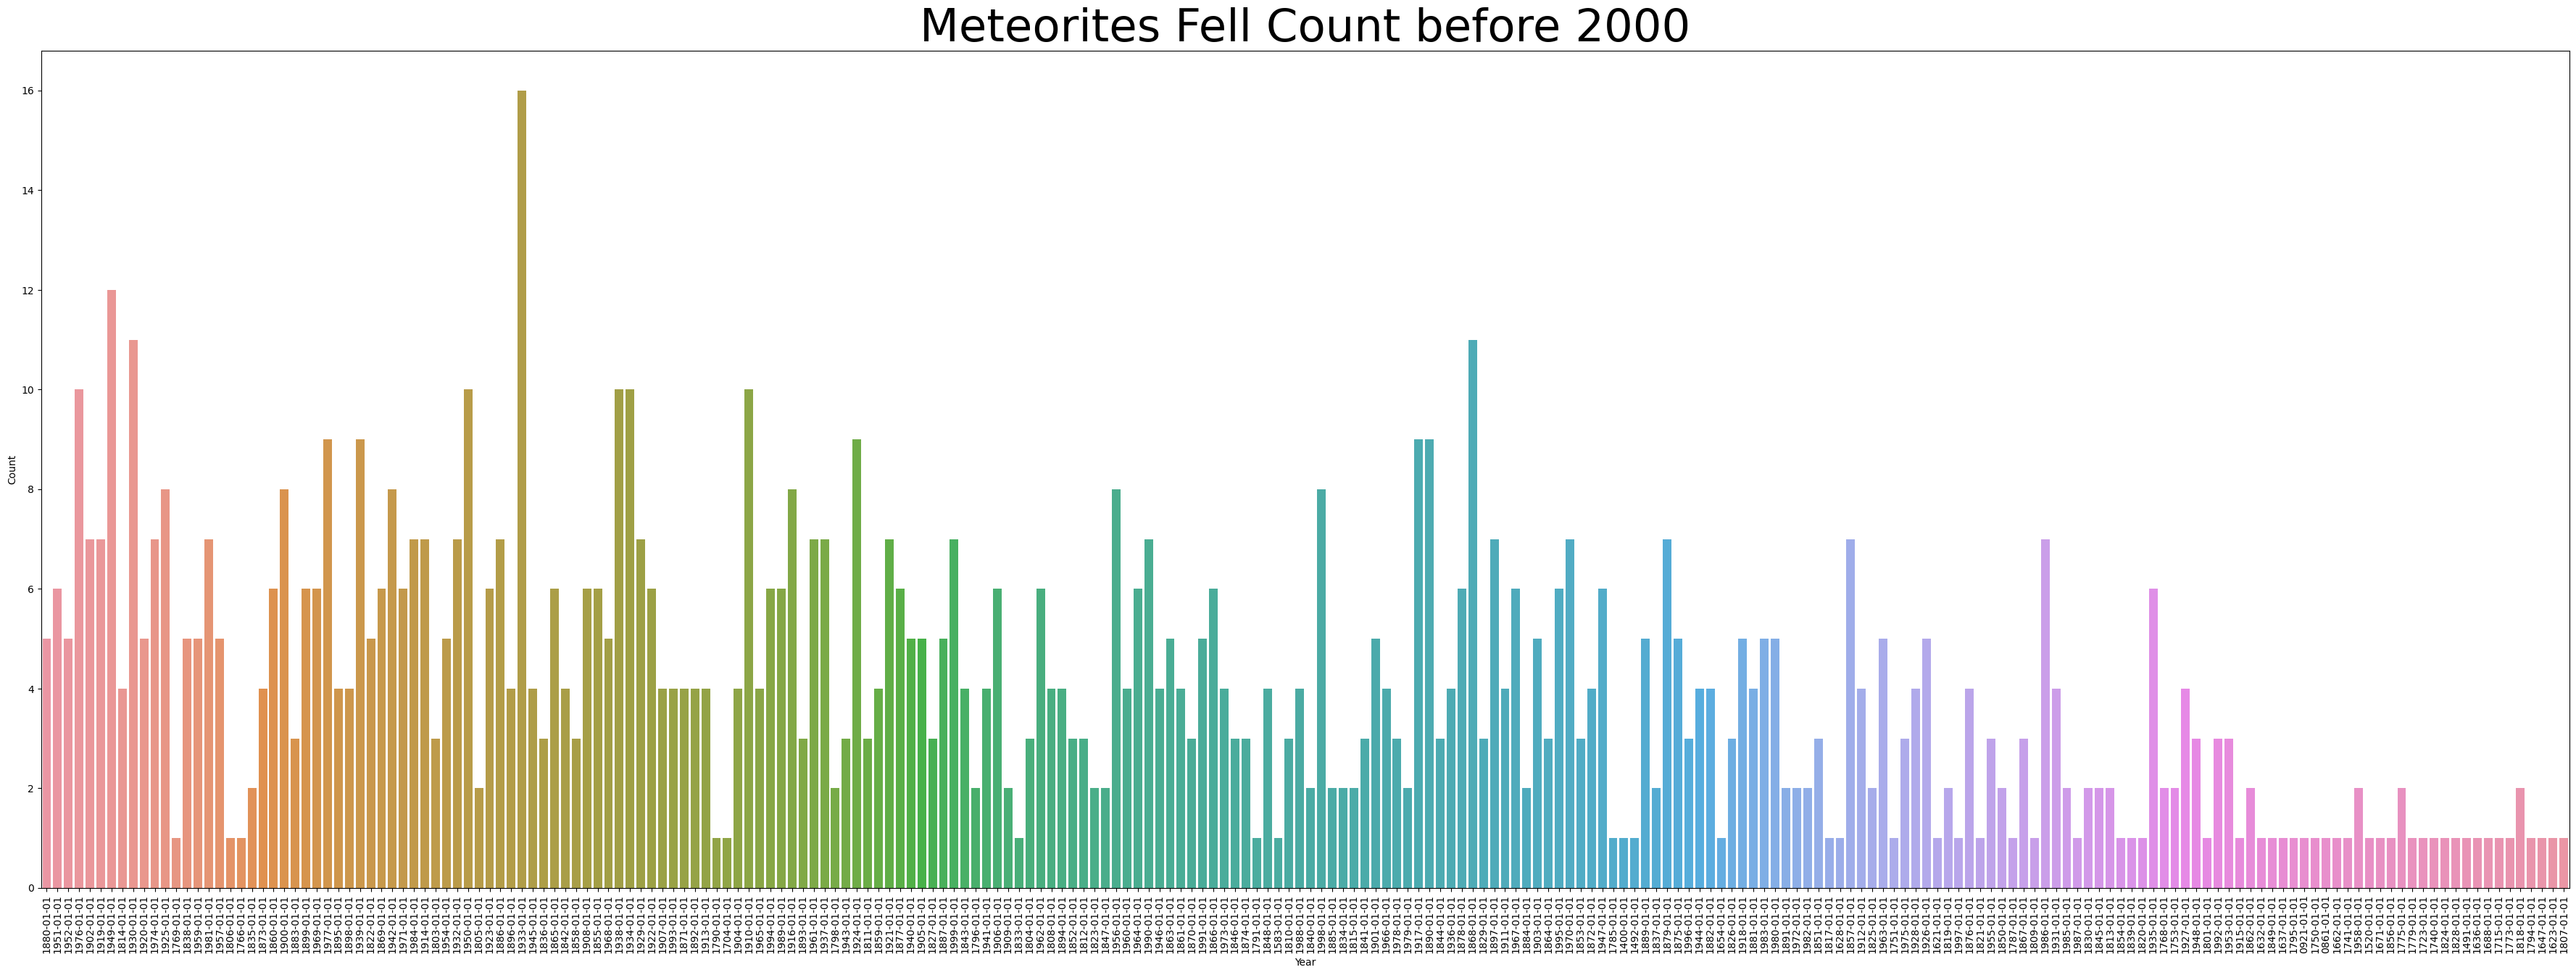

In [17]:
plt.figure(figsize=(45, 15))               # Plot the countplot of meteorites that fell before the year 2000
sns.countplot(data=fell_before_2000, x='Year')  # count plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Meteorites Fell Count before 2000', fontsize = 45)
plt.xticks(rotation=90)
plt.show()

In [21]:
earth_meteroites =df[(df['Year'].apply(split_year)<2000)]['name']
earth_meteroites   # Get all the Earth meteorites that fell before the year 2000

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
994     Timochin
995     Tirupati
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: name, Length: 930, dtype: object

#### Get all the earth meteorites co-ordinates who fell before the year 1970

In [23]:
# Filter out the meteorites coordinates fell before the year 1970

earth_meteorites_before_1970 = df[(df['reclat'].notnull()) & (df['reclong'].notnull()) & (df['Year'].apply(split_year)<2000) & (df['fall'] == 'Fell')]

coordinates = earth_meteorites_before_1970[['reclat', 'reclong']]

In [24]:
coordinates = earth_meteorites_before_1970[['reclat', 'reclong']]    # getting coordinates

In [25]:
coordinates   # getting coordinates

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
3,16.88333,-99.90000
4,-33.16667,-64.95000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


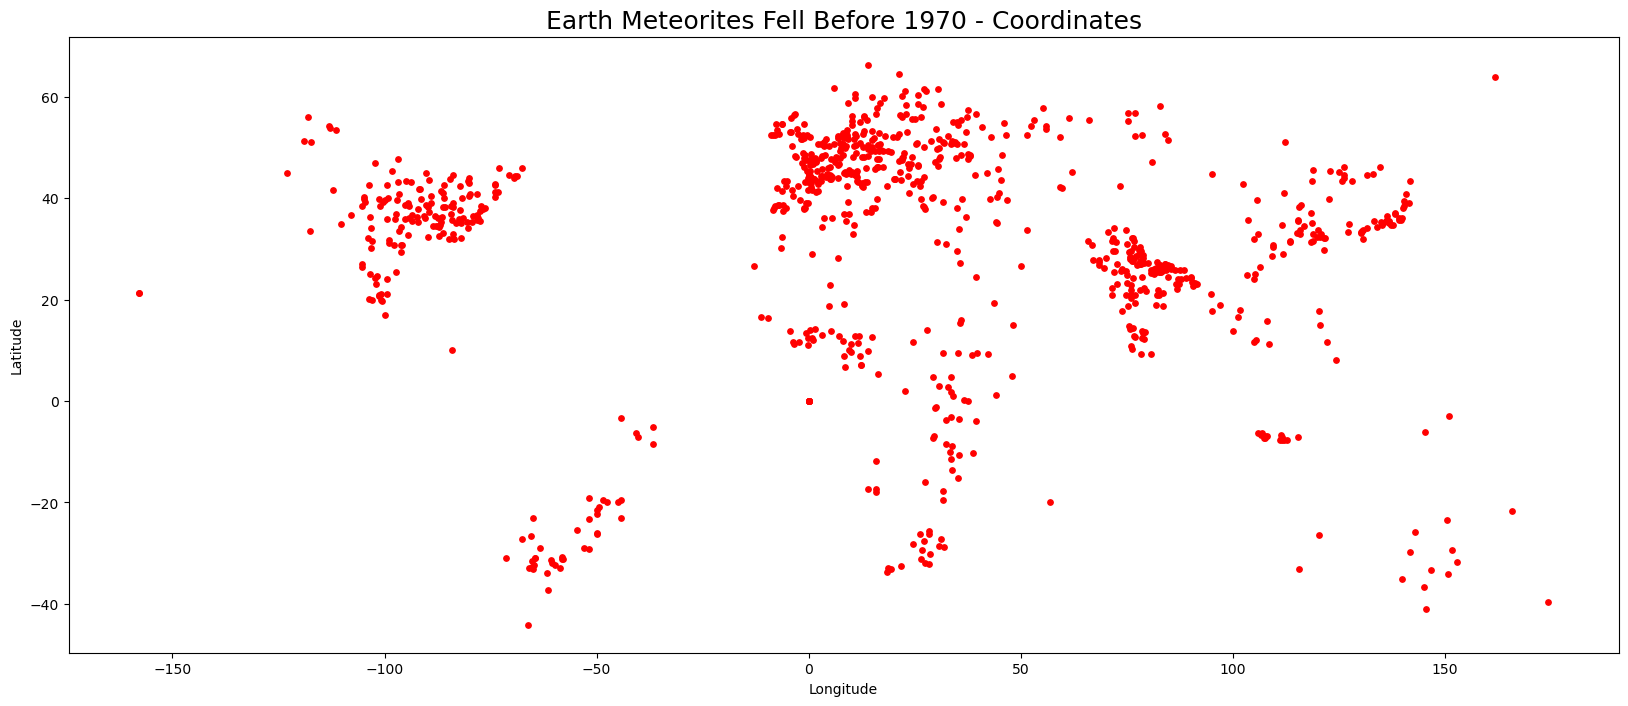

In [26]:
# Create a scatter plot of meteorite coordinates
plt.figure(figsize=(20, 8))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], s=15, c='red') # scattering values
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Fell Before 1970 - Coordinates', fontsize = 18)
plt.show()

#### The meteorites mass whose mass was more than 10000 kg

In [27]:
# Filter the meteorites mass whose mass was more than 10000 kg
high_mass_meteorites = df[df['mass'] > 10000]

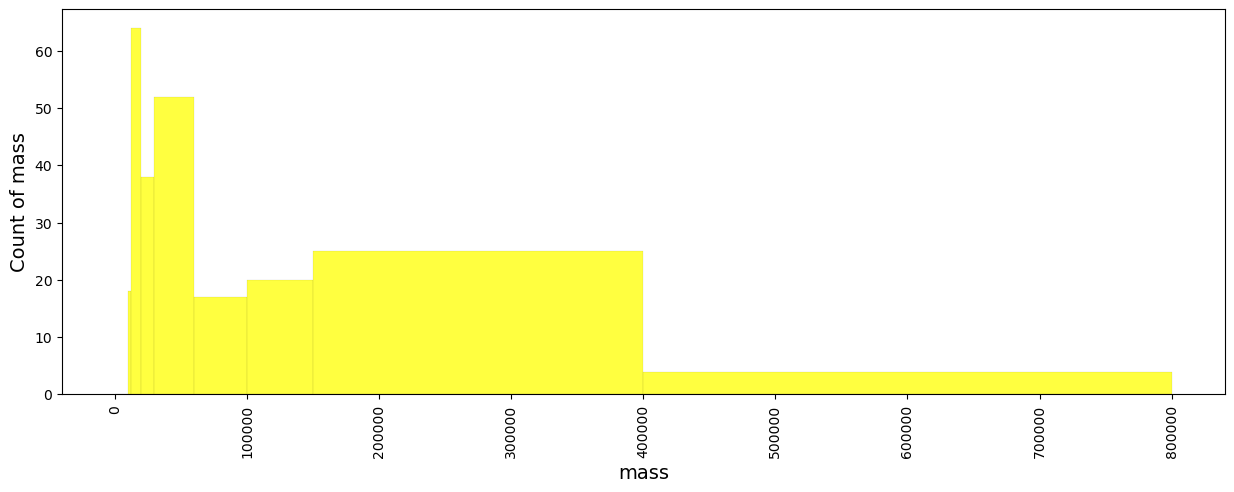

In [28]:
#plotting mass
axs,fig =plt.subplots(1,1,figsize=(15,5))
plt.subplot(111)
sns.histplot(data=high_mass_meteorites ,x='mass',bins=[0,500,1000,3000,5000,7000,9000,10000,12000,20000,30000,60000,100000,150000,400000,800000],color='yellow')
plt.xlabel("mass", size=14) 
plt.ylabel("Count of mass", size=14)
plt.xticks(rotation=90)
plt.show()